In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!wget https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/dataset.csv
!wget https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/ANSWERS.csv

--2021-12-13 01:24:02--  https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 622307 (608K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 607.72K  --.-KB/s    in 0.04s   

2021-12-13 01:24:02 (13.9 MB/s) - ‘dataset.csv’ saved [622307/622307]

--2021-12-13 01:24:02--  https://raw.githubusercontent.com/maratonadev/desafio-5-2021/main/assets/data/ANSWERS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18232

In [4]:
dataset = pd.read_csv('dataset.csv')  
answers = pd.read_csv('ANSWERS.csv')  

In [46]:
dataset

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,3418,Female,0.0,No,No,26.0,Yes,No,DSL,No,Yes,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),131.55,1483.7,No
1,6865,Male,0.0,No,No,39.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.61,2737.31,No
2,2799,Male,0.0,No,No,1.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),9.26,9.26,No
3,1584,Male,0.0,Yes,Yes,66.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),42.14,1689.19,No
4,9997,Male,0.0,No,No,56.0,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,126.24,5608.69,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4543,5586,Male,0.0,No,No,3.0,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,NaN,Mailed check,25.14,121.39,No
4544,4840,Male,0.0,No,No,7.0,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,200.74,647.14,Yes
4545,7587,Male,0.0,No,No,18.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),46.47,1500.07,No
4546,4176,Female,0.0,Yes,Yes,55.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),13.07,1375.42,No


In [91]:
answers

,ID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN
0,6946,Female,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,51.71,90.81,TO_FILL
1,2228,Male,0,No,No,47,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),57.05,979.6,TO_FILL
2,3591,Male,0,Yes,No,62,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,One year,No,Electronic check,235.56,6140.91,TO_FILL
3,1153,Male,0,No,Yes,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,142.25,142.25,TO_FILL
4,5227,Male,0,No,No,24,Yes,No,DSL,Yes,No,No,Yes,No,No,Month-to-month,No,Electronic check,105.40,1398.95,TO_FILL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,5478,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,23.41,75.76,TO_FILL
1320,6297,Male,0,Yes,Yes,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),62.51,6554.96,TO_FILL
1321,7952,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,227.81,6872.81,TO_FILL
1322,8473,Male,0,No,No,11,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,7.33,747.88,TO_FILL


In [120]:
from sklearn.preprocessing import OneHotEncoder
cat = ["GENDER","SENIORCITIZEN","PARTNER","DEPENDENTS","PHONESERVICE","MULTIPLELINES","INTERNETSERVICE","ONLINESECURITY","ONLINEBACKUP","DEVICEPROTECTION","TECHSUPPORT","STREAMINGTV","STREAMINGMOVIES","CONTRACT","PAPERLESSBILLING","PAYMENTMETHOD"]
enc = OneHotEncoder(handle_unknown='ignore')
new = dataset.drop(columns=['ID']).copy().dropna()
enc.fit(new[cat])

new_onehot = enc.transform(new[cat]).toarray()
new.drop(columns=cat, inplace=True)
new[enc.get_feature_names_out(cat)] = new_onehot
print(len(new))

4106


In [90]:
new = answers.drop(columns=['ID']).copy()
new_onehot = enc.transform(new[cat]).toarray()
new.drop(columns=cat, inplace=True)
new[enc.get_feature_names_out(cat)] = new_onehot
print(len(new))

1324


In [121]:
def fun(x):
  try:
    return float(x.replace(',', '.'))
  except:
    print(x)
    return 0

In [122]:
new["TOTALCHARGES"] = new["TOTALCHARGES"].apply(fun).astype(float)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error

In [123]:
features = ["TENURE","MONTHLYCHARGES","TOTALCHARGES"]
features = [*features , *enc.get_feature_names_out(cat)]
target = ['CHURN']
X = new[features]
y = new[target]

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=None)

In [150]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [27]:
#from sklearn.preprocessing import MinMaxScaler
#nor = MinMaxScaler()

#X_train = nor.fit_transform(X_train)
#X_test = nor.transform(X_test)

In [69]:
#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [80]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=2, include_bias=False)
#X_train = poly.fit_transform(X_train)
#X_test=poly.transform(X_test)

In [152]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
# Defines model that the data is trained on
model = MLPClassifier( hidden_layer_sizes=(60,80,45), max_iter=60)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f1_score(y_test, y_pred,pos_label='Yes'))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6173503698722259


In [101]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
#para = {'base_score': 0.9, 'gamma': 0, 'learning_rate': 1.005, 'max_delta_step': 1, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 161}
#para = {'base_score': 0.25, 'gamma': 0, 'learning_rate': 1.0051, 'max_delta_step': 1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 92}
#{'base_score': 0.04, 'gamma': 0, 'learning_rate': 1.0051, 'max_delta_step': 1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 110}
para ={'base_score': 0.9, 'gamma': 0, 'learning_rate': 0.05, 'max_delta_step': 2, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50}
clf = xgb.XGBClassifier(**para)
f1_scorer1 = make_scorer(f1_cus, greater_is_better=True)
parameter_space = {'n_estimators' : [i for i in range(90,170,10)]}
space = {
    'max_depth': [2,3,4],
    'learning_rate': [1.05,1.005,0.005,0.05],
    'n_estimators': [50],
    'max_delta_step': [1,2],
    'min_child_weight': [1,2],
    'base_score' : [0.5,0.9,0.25,0.75],
    'gamma': [0]
}
dev = GridSearchCV(clf, space, n_jobs=-1, scoring=f1_scorer1)
dev.fit(X_train,y_train)
print('Best parameters found:\n', dev.best_params_)
# All results
means = dev.cv_results_['mean_test_score']
stds = dev.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, dev.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean*100, std * 2, params))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [0.79175294 0.79857317 0.79644704 0.79840379 0.78886565 0.79315031
 0.78502279 0.79626655 0.79291601 0.79330376 0.77819957 0.78683805
 0.79733119 0.78811725 0.79059983 0.78930684 0.78431552 0.78569576
 0.78659257 0.79356276 0.78388278 0.7926869  0.78258768 0.78917197
 0.79710056 0.79710056 0.80080646 0.80155397 0.80623996 0.80584747
 0.79542811 0.79542811 0.80227048 0.80227048 0.81373856 0.81373856
 0.82183592 0.82183592 0.82649265 0.82638924 0.82256022 0.82145383
 0.82781633 0.82781633 0.82852438 0.82716639 0.82500159 0.82254415
 0.79680774 0.79716089 0.78950096 0.78645841 0.78622499 0.78979585
 0.78775054 0.79297369 0.79060786 0.794081   0.7879539  0.78483212
 0.79102903 0.78870591 0.79198348 0.78619708 0.78764521 0.78567553
 0.78375452 0.79298731 0.79018647 0.78991338 0.78346309 0.77748015
 0.66666662 0.66666662 0.66666662 0.66666662 0.66666662 0

Best parameters found:
 {'base_score': 0.5, 'gamma': 0, 'learning_rate': 0.05, 'max_delta_step': 2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50}
79.175 (+/-0.340) for {'base_score': 0.5, 'gamma': 0, 'learning_rate': 1.05, 'max_delta_step': 1, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 50}
79.857 (+/-0.330) for {'base_score': 0.5, 'gamma': 0, 'learning_rate': 1.05, 'max_delta_step': 1, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 50}
79.645 (+/-0.333) for {'base_score': 0.5, 'gamma': 0, 'learning_rate': 1.05, 'max_delta_step': 1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50}
79.840 (+/-0.315) for {'base_score': 0.5, 'gamma': 0, 'learning_rate': 1.05, 'max_delta_step': 1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 50}
78.887 (+/-0.323) for {'base_score': 0.5, 'gamma': 0, 'learning_rate': 1.05, 'max_delta_step': 1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50}
79.315 (+/-0.316) for {'base_score': 0.5, 'gamma': 0, 'l

In [40]:
from sklearn.metrics import confusion_matrix

def f1S(test, pred):
  cf_matrix = confusion_matrix(test, pred)
  accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
  precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
  recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
  f1_score  = 2*precision*recall / (precision + recall)
  return {'accuracy':accuracy,'recall': recall,'precision': precision,'f1_score': f1_score}

def f1_cus(test, pred):
  cf_matrix = confusion_matrix(test, pred)
  accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
  precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
  recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
  f1_score  = 2*precision*recall / (precision + recall)
  return f1_score

Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.606\nPrecision=0.366\nRecall=0.938\nF1 Score=0.5263157894736842')

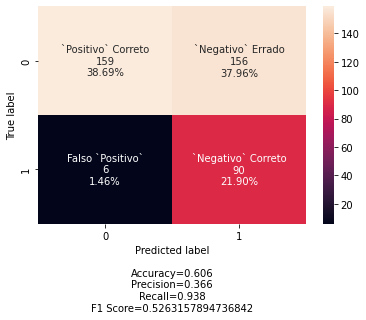

In [104]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

In [95]:
answers[target] = model.predict(X)

In [98]:
answers.to_csv('ANSWERS2.csv', index=False)  